# **British Airways Analysis**

## **1. Overview of Data**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customer_booking.csv')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,261,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [8]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.shape

(50000, 14)

## **2. Sales Channel Effectiveness:**

### Are there any underutilized sales channels that could be optimized for increased bookings?

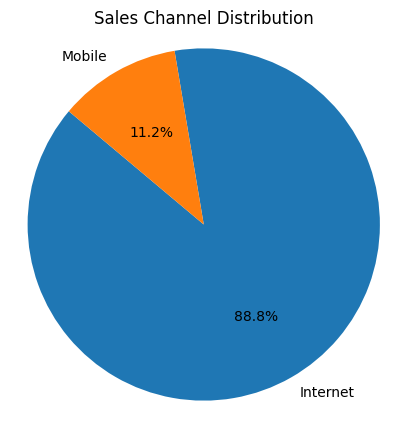

In [19]:
sales_channel_counts = df['sales_channel'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sales Channel Distribution')
plt.show()

### How can the airline tailor marketing strategies based on the preferred sales channels of different customer segments?

In [30]:
df[(df['sales_channel'] == 'Internet') & ((df['wants_extra_baggage'] == 1) |
                                        (df['wants_in_flight_meals'] == 1) |
                                        (df['wants_preferred_seat'] == 1))].shape[0]


35367

In [31]:
df[(df['sales_channel'] == 'Mobile') & ((df['wants_extra_baggage'] == 1) |
                                        (df['wants_in_flight_meals'] == 1) |
                                        (df['wants_preferred_seat'] == 1))].shape[0]


4178

#### In mobiles sale channel, less than 10% passengers booked extra treatment in flight. Airlines can improve this

## **3. Service Customization:**

### What are the most popular additional services requested by passengers?

In [38]:
services_counts = {
    'preferred_seat': df[df['wants_preferred_seat'] == 1].shape[0],
    'in_flight_meal': df[df['wants_in_flight_meals'] == 1].shape[0],
    'extra_baggage': df[df['wants_extra_baggage'] == 1].shape[0]
}

max_service = max(services_counts, key=services_counts.get)

print("Service with the maximum count:", max_service)

Service with the maximum count: extra_baggage


## **4. Route Optimization:**

### a. Which routes have the highest demand and profitability?

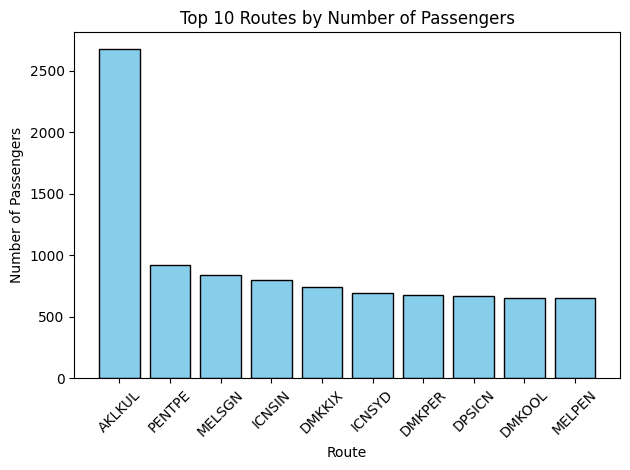

In [55]:
routes = df.groupby('route')['num_passengers'].count().sort_values(ascending=False).head(10)

plt.bar(routes.index, routes.values, color='skyblue', edgecolor='black')
plt.xlabel('Route')
plt.ylabel('Number of Passengers')
plt.title('Top 10 Routes by Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### b. Are there any routes with low demand that could be discontinued or restructured?

In [81]:
routes = pd.DataFrame(df.groupby('route')['num_passengers'].count().sort_values(ascending=True))
routes[routes['num_passengers'] < 100]

,num_passengers
route,
URTXIY,1
CSXSYD,1
BTJJED,1
CTUSRG,1
LBUTPE,1
...,...
MELPEK,97
KCHPEK,98
BKIPEK,98
